Populating the interactive namespace from numpy and matplotlib


/home/shambhavi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['close', 'gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


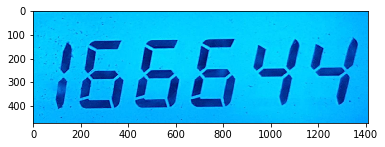

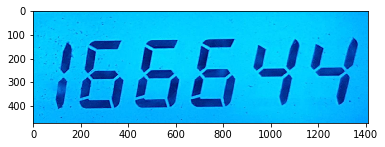

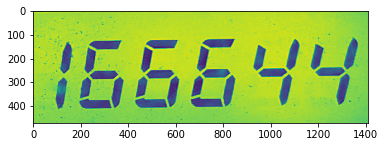

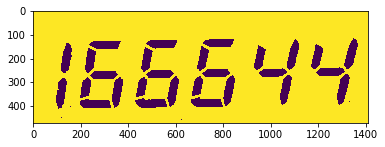

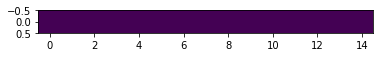

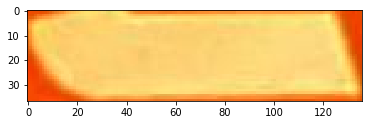

True

In [106]:
import numpy as np
import cv2
%pylab inline
import matplotlib.pyplot as plt

def display_image(image):
    plt.imshow(image)
    plt.show()

image = cv2.imread('/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output/13.jpg-cropped.jpg')
original = image.copy()
display_image(original)
h, w, _ = image.shape

kernel = np.ones((1, 1), np.uint8) 
  
# Using cv2.erode() method  
image = cv2.erode(image, kernel)
display_image(image)



gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
display_image(thresh)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))
display_image(kernel)
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)


cnts = cv2.findContours(close, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
minimum_area = .75 * h * w
cnts = [c for c in cnts if cv2.contourArea(c) < minimum_area]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = 255 - original[y:y+h, x:x+w]
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    
    break
    
display_image(ROI)
    

cv2.imwrite('/home/shambhavi/Downloads/Odometer_Images__Stock_Photos_&_Vectors___Shutterstock/Output/roi.jpg', ROI) 

In [107]:
from pytesseract import image_to_string
def ocr_image(image):

    return image_to_string(ROI,lang='eng', config='--psm 13 --oem 0 -c tessedit_char_whitelist=0123456789')

In [108]:
ocr_image(gray)

'12         7 1'